<a href="https://colab.research.google.com/github/EugenHotaj/experimental/blob/master/discrete_samling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [181]:
def sample(cdf: List[float]) -> int:
    u = np.random.uniform()
    idx = 0
    while cdf[idx] < u:
        idx += 1
    return idx

In [182]:
pmf = [0.05, 0.1, 0.2, 0.3, 0.2, 0.1, 0.05]
cdf = np.cumsum(pmf)

(array([ 4868.,  9972., 19976., 30094., 20049.,  9951.,  5090.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

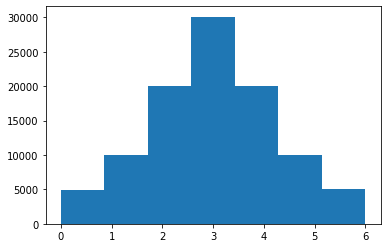

In [183]:
Xs = []
for i in range(100000):
    x = sample(cdf)
    Xs.append(x)
plt.hist(Xs, bins=len(cdf))

In [184]:
from bisect import bisect

def sample_binary_search(cdf: List[float]) -> int:
    u = np.random.uniform()
    return bisect(cdf, u) 

(array([ 4953.,  9955., 19977., 29939., 20036., 10070.,  5070.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

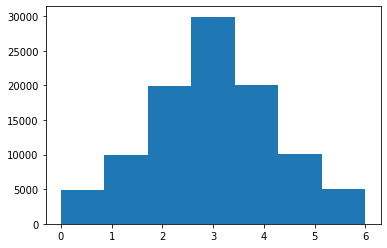

In [185]:
Xs = []
for i in range(100000):
    x = sample_binary_search(cdf)
    Xs.append(x)
plt.figure(figsize=(6, 4))
plt.hist(Xs, bins=len(cdf))

In [186]:
import copy
def construct_table(pmf):
    pmf, mean, table = copy.copy(pmf), np.mean(pmf), []
    for i in range(len(pmf)):
        idxs = np.argsort(pmf)
        i, j = idxs[i], idxs[-1]
        tau = pmf[i] / mean
        table.append((tau, i, j))
        pmf[j] -= mean - pmf[i] 
        pmf[i] = 0  # Set to 0 to maintain correct sorting.
    return table 

def sample_alias(alias_table) -> int:
    N = len(alias_table)
    u_1, u_2 = np.random.uniform(), np.random.uniform()
    tau, i, j= alias_table[int(u_1 * N)]
    return i if u_2 < tau else j


In [187]:
table = construct_table(pmf)

(array([ 4960., 10064., 19914., 29856., 20065., 10029.,  5112.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

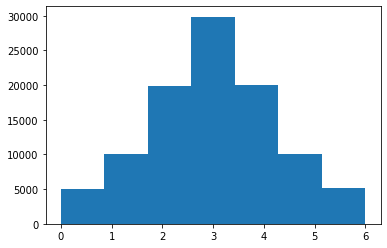

In [188]:
Xs = []
for i in range(100000):
    x = sample_alias(table)
    Xs.append(x)
plt.figure(figsize=(6, 4))
plt.hist(Xs, bins=len(table))